In [1]:
import numpy as np
import cv2
from mnist import MNIST
from const import *
from matplotlib import pyplot as plt

In [2]:
# Create dataset with full size 28*28
digits, labels = MNIST('./MNIST').load_training()

with open("./image.dat", "w") as image_file:
    for i in range(M):
        tmp = "\n".join(str(bit) for bit in digits[i]) + "\n"
        image_file.writelines(tmp)

with open("./label.dat", "w") as label_file:
    for i in range(M):
        label_file.writelines(str(labels[i]) + "\n")

digits = np.array(digits)
digits = digits[:50, :]
print(digits.shape)
print(digits.mean())


(50, 784)
31.131326530612245


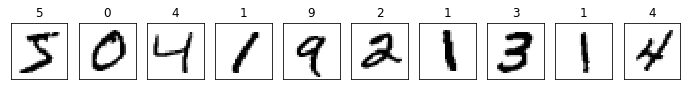

In [24]:
# Plot dataset
fig, ax = plt.subplots(1, 10)
digits = np.zeros([10, 28, 28], dtype=np.uint8)

with open("./image.dat") as image_file:
    for i in range(10):
        for j in range(28):
            for k in range(28):
                digits[i][j][k] = int(image_file.readline())

for i in range(10):
    digit = digits[i]
    ax[i].imshow(digit, cmap=plt.cm.gray_r, interpolation="nearest")
    ax[i].set_title(labels[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig.set_size_inches(12, 2)
fig.savefig("mnist-28.png")

In [29]:
# Create down-sampled dataset to 4*4
digits, labels = MNIST('./MNIST').load_training()

with open("./image_ds.dat", "w") as image_file:
    for i in range(M):
        digit_np = np.array(digits[i]).reshape([28, 28]).astype('float32')
        down_sampled_digits = cv2.resize(digit_np, (4, 4)).flatten().astype(np.uint8)
        tmp = "\n".join(str(int(bit)) for bit in down_sampled_digits) + "\n"
        image_file.writelines(tmp)

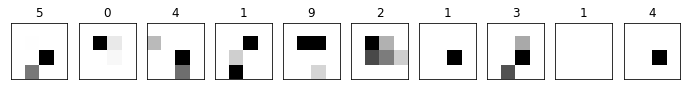

In [32]:
# Plot dataset
fig, ax = plt.subplots(1, 10)
digits = np.zeros([10, 4, 4], dtype=np.uint8)

with open("./image_ds.dat") as image_file:
    for i in range(10):
        for j in range(4):
            for k in range(4):
                digits[i][j][k] = int(image_file.readline())

for i in range(10):
    digit = digits[i]
    ax[i].imshow(digit, cmap=plt.cm.gray_r, interpolation="nearest")
    ax[i].set_title(labels[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig.set_size_inches(12, 2)
fig.savefig("mnist-4.png")